**Training an image classifier**

We will do the following steps in order:

* Load and normalize the CIFAR10 training and test datasets using torchvision

* Define a Convolutional Neural Network

* Define a loss function

* Train the network on the training data

* Test the network on the test data


**Load and normalize CIFAR10**

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].




In [44]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models

transform_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


**Let us show some of the training images.**

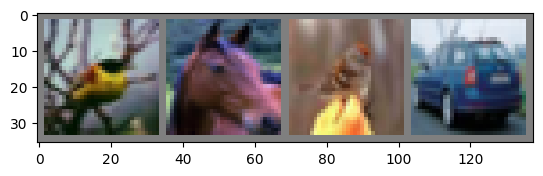

bird  horse bird  car  


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**Define a Convolutional Neural Network**

In [46]:
import torch.nn as nn
import torch.nn.functional as F


net = models.resnet18(weights='IMAGENET1K_V1')
# No weights - random initialization
# resnet50(weights=None)

num_ftrs = net.fc.in_features
# Here the size of each output sample is set to 10.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
net.fc = nn.Linear(num_ftrs, 10)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Define a Loss function and optimizer**

In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

**Train the network**

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [48]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.910
[1,  4000] loss: 1.702
[1,  6000] loss: 1.602
[1,  8000] loss: 1.545
[1, 10000] loss: 1.506
[1, 12000] loss: 1.409
[2,  2000] loss: 1.354
[2,  4000] loss: 1.346
[2,  6000] loss: 1.288
[2,  8000] loss: 1.263
[2, 10000] loss: 1.231
[2, 12000] loss: 1.207
[3,  2000] loss: 1.150
[3,  4000] loss: 1.150
[3,  6000] loss: 1.134
[3,  8000] loss: 1.109
[3, 10000] loss: 1.093
[3, 12000] loss: 1.109
[4,  2000] loss: 1.025
[4,  4000] loss: 1.029
[4,  6000] loss: 1.035
[4,  8000] loss: 1.008
[4, 10000] loss: 1.019
[4, 12000] loss: 1.002
[5,  2000] loss: 0.959
[5,  4000] loss: 0.958
[5,  6000] loss: 0.955
[5,  8000] loss: 0.958
[5, 10000] loss: 0.939
[5, 12000] loss: 0.909
[6,  2000] loss: 0.904
[6,  4000] loss: 0.877
[6,  6000] loss: 0.908
[6,  8000] loss: 0.888
[6, 10000] loss: 0.866
[6, 12000] loss: 0.865
[7,  2000] loss: 0.824
[7,  4000] loss: 0.830
[7,  6000] loss: 0.863
[7,  8000] loss: 0.816
[7, 10000] loss: 0.836
[7, 12000] loss: 0.830
[8,  2000] loss: 0.784
[8,  4000] 

**Save the trained model on disk.**

In [49]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

**Test the network on the test data**

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.


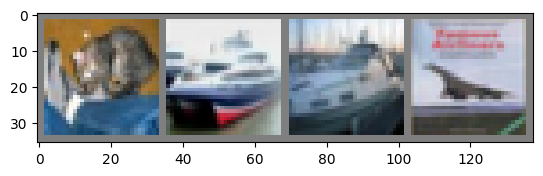

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   ship  deer  plane


In [50]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

net = models.resnet18(weights=None)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 10)

net.load_state_dict(torch.load(PATH, weights_only=True))

outputs = net(images)

# The outputs are probabilites for the 10 classes. The higher the probality for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest probability:

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))



**Let us look at how the network performs on the whole dataset.**

In [51]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 73 %


**Hmmm, what are the classes that performed well, and the classes that did not perform well:**

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 33.3 %
Accuracy for class: car   is 60.2 %
Accuracy for class: bird  is 36.9 %
Accuracy for class: cat   is 34.3 %
Accuracy for class: deer  is 59.2 %
Accuracy for class: dog   is 37.7 %
Accuracy for class: frog  is 66.9 %
Accuracy for class: horse is 69.5 %
Accuracy for class: ship  is 79.9 %
Accuracy for class: truck is 71.0 %
